In [1]:
import numpy as np

In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import shutil  
import re 

In [3]:
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

chosen_transforms = {'Training': transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]), 'Test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]),
}

In [8]:
base_dir = "C:\\Users\\91958\\fruits\\fruits-360"
data_dir = base_dir + '/'
os.listdir(data_dir)

['LICENSE', 'papers', 'readme.md', 'Test', 'test-multiple_fruits', 'Training']

In [9]:
chosen_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
  chosen_transforms[x])
                  for x in ['Training', 'Test']}

In [10]:
dataloaders = {x: torch.utils.data.DataLoader(chosen_datasets[x], batch_size=4,
  shuffle=True, num_workers=4)
              for x in ['Training', 'Test']}

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


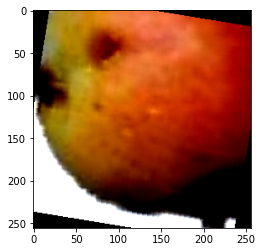

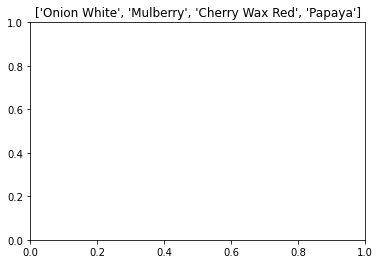

In [24]:
def imshow(img, title = None):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    if title is not None:
        plt.title(title)
    
inputs, classes = next(iter(dataloaders['Training']))
out = torchvision.utils.make_grid(inputs[3])
imshow(out, title=[class_names[x] for x in classes] )

In [35]:
dataset_sizes = {x: len(chosen_datasets[x]) for x in ['Training', 'Test']}
class_names = chosen_datasets['Training'].classes
len(class_names)

120

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


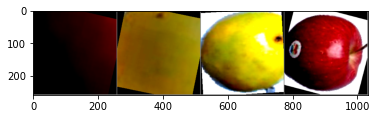

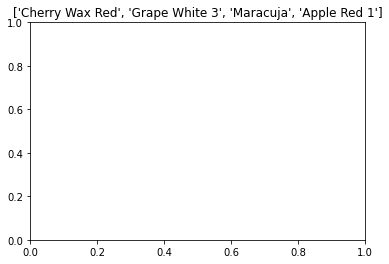

In [26]:
inputs, classes = next(iter(dataloaders['Training']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [27]:
my_resnet_model = models.resnet34(pretrained=True)

num_features = my_resnet_model.fc.in_features
my_resnet_model.fc = nn.Linear(num_features, 2)

In [28]:
my_resnet_model = my_resnet_model.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(my_resnet_model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [34]:
num_epochs = 3
for epoch in range(num_epochs):
        
    running_loss = 0.0
    for i, data in enumerate(dataloaders['Training'], 0): 
        exp_lr_scheduler.step()
        my_resnet_model.train()  # Set model to training mode
        
        for inputs, labels in dataloaders['Training']:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer_ft.zero_grad()
                outputs = my_resnet_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer_ft.step()
        
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')
        

RuntimeError: CUDA error: device-side assert triggered